In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [287]:
df = pd.read_csv("diamonds.csv")

In [288]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [289]:
# Dropping unnamed column
df.drop(columns="Unnamed: 0", axis=1,inplace=True)

In [290]:
df.shape

(53940, 10)

In [291]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [270]:
df.drop(df[df['x']==0].index,inplace=True)
df.drop(df[df['y']==0].index,inplace=True)
df.drop(df[df['z']==0].index,inplace=True)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


<AxesSubplot:>

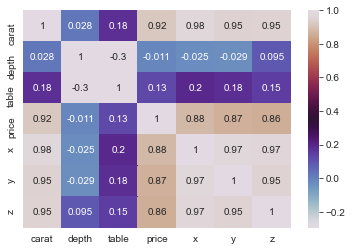

In [292]:
# checking for multicollinearity
# plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="twilight",annot=True)

C:\Users\Vikitha Reddy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

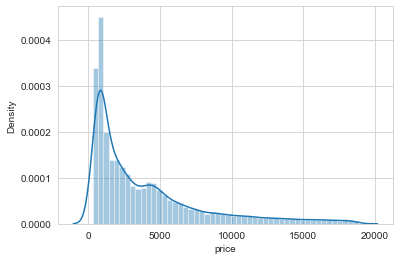

In [293]:
# Visualization
sns.distplot(df["price"])

Text(0.5, 1.0, 'Price vs Carat')

<Figure size 1008x432 with 0 Axes>

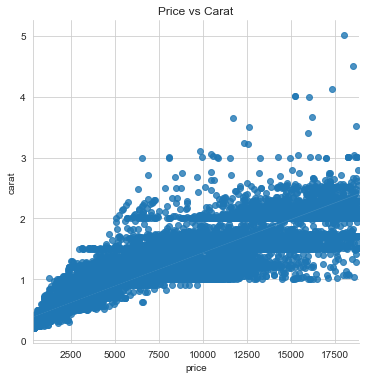

In [294]:
fig = plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.lmplot(x="price",y="carat",data=df, palette ='plasma')
plt.title('Price vs Carat')

In [306]:
X = df.drop('price',axis=1)
y = df['price']

In [310]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [329]:
cat_columns = X.select_dtypes(include='object')
num_columns = X.select_dtypes(include='number')
num_columns

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [330]:
cat_columns

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [311]:
num_columns.describe(percentiles=[0.01,0.10,0.15,0.25,0.50,0.75,0.90,0.99])

,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
1%,0.240000,57.900000,53.000000,4.020000,4.040000,2.480000
10%,0.310000,60.000000,55.000000,4.360000,4.360000,2.690000
15%,0.320000,60.500000,55.000000,4.420000,4.430000,2.730000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000


In [312]:
def outliers(X):
    X = X.clip(lower=X.quantile(0.01))
    X = X.clip(upper=X.quantile(0.99))
    return(X)

In [313]:
# Capping and flooring the Extreme values
num_columns = num_columns.apply(lambda X: outliers(X))

In [314]:
num_columns

,carat,depth,table,x,y,z
0,0.24,61.5,55.0,4.02,4.04,2.48
1,0.24,59.8,61.0,4.02,4.04,2.48
2,0.24,57.9,64.0,4.05,4.07,2.48
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [315]:
num_columns.describe(percentiles=[0.01,0.10,0.15,0.25,0.50,0.75,0.90,0.99])

,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.795669,61.745775,57.445549,5.729961,5.731994,3.537917
std,0.465429,1.341313,2.173495,1.112109,1.104513,0.686356
min,0.240000,57.900000,53.000000,4.020000,4.040000,2.480000
1%,0.240000,57.900000,53.000000,4.020000,4.040000,2.480000
10%,0.310000,60.000000,55.000000,4.360000,4.360000,2.690000
15%,0.320000,60.500000,55.000000,4.420000,4.430000,2.730000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000


In [316]:
# No columns with zero variance
from sklearn.feature_selection import VarianceThreshold
try:
    var_thresh = VarianceThreshold(threshold=0.0)
    var_thresh.fit_transform(num_columns)
except ValueError:
    cols=var_thresh.get_support()
    cols

In [318]:
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [331]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in cat_columns:
    cat_columns[i] = encoder.fit_transform(cat_columns[i])
cat_columns

<ipython-input-331-1f8510743808>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_columns[i] = encoder.fit_transform(cat_columns[i])


,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
...,...,...,...
53935,2,0,2
53936,1,0,2
53937,4,0,2
53938,3,4,3


In [333]:
X_all = pd.concat([num_columns,cat_columns],axis=1,join='inner')
X_all

,carat,depth,table,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,3.89,3.84,2.31,3,1,2
2,0.23,56.9,65.0,4.05,4.07,2.31,1,1,4
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,2,0,2
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,2
53937,0.70,62.8,60.0,5.66,5.68,3.56,4,0,2
53938,0.86,61.0,58.0,6.15,6.12,3.74,3,4,3


In [334]:
X_train,X_test,y_train,y_test = train_test_split(X_all,y,train_size=0.8,random_state=19)

In [336]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [337]:
# params = {'n_estimators':[20,30,50,100,200,300,400,500,500],
#          'min_samples_split':np.arange(2,10),
#          'min_samples_leaf':np.arange(3,15),
#          'max_depth':[10,20,30,40,50]}
regressor = RandomForestRegressor(max_depth=10, n_estimators=51, min_samples_split=5, min_samples_leaf=4,n_jobs=-1)
regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=51, n_jobs=-1)

In [338]:
regressor.score(X_train,y_train)

0.9830007231176665

In [339]:
y_pred = regressor.predict(X_test)

In [340]:
print(r2_score(y_test,y_pred))

0.9793332094990848


In [341]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train, y_train)
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

C:\Users\Vikitha Reddy\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Model Accuracy: 0.973
The mean squared error (MSE) on test set: 410652.2920


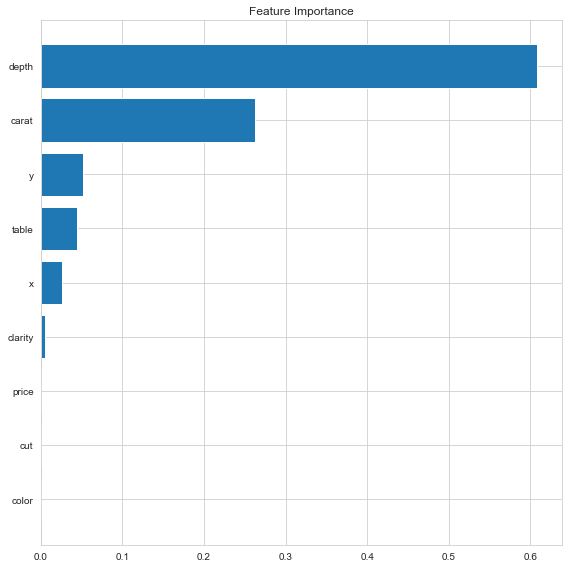

In [342]:
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title('Feature Importance')
result = permutation_importance(gbr, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()